### Identifier et traiter les valeurs manquantes


Dans cette étape, On:
- Importe les données
- Supprime la colonne des IDs
- Remplace les valeur manquantes par NaN, afin d'etre identifier par KNNImputer
- Garde les valeurs nuls (les zeros) de la colonne Pregnancies, parce que c'est logique
- Utilise KNNImputer pour remplacer les valeurs manquantes
- On affiche le nombre de valeurs nuls, pour confirmer le success de remplacement


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
import os
import numpy as np

df = pd.read_csv(os.getcwd() + '/../data/raw/dataset-diabete.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)

df["Glucose"] = df["Glucose"].replace(0, np.nan)
df["BloodPressure"] = df["BloodPressure"].replace(0, np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.nan)
df["Insulin"] = df["Insulin"].replace(0, np.nan)
df["BMI"] = df["BMI"].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df.isnull().sum(), '\n\n')

- **Histograms aprés modifications:**

In [ ]:
import matplotlib.pyplot as plt

counts = df['Age'].value_counts().sort_index()

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.bar(counts.index, counts.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Bar Plot of Age")

counts = df['Pregnancies'].value_counts().sort_index()

plt.subplot(3, 3, 2)
plt.bar(counts.index, counts.values)
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.title("Bar Plot of Pregnancies")

plt.subplot(3, 3, 3)
plt.hist(x=df["Glucose"], rwidth=0.9, bins=range(0, round(df["Glucose"].max() + 2), 10))
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.title("Histogram of Glucose")

plt.subplot(3, 3, 4)
plt.hist(x=df["BloodPressure"], rwidth=0.9, bins=range(0, round(df["BloodPressure"].max() + 2), 5))
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.title("Histogram of BloodPressure")

plt.subplot(3, 3, 5)
plt.hist(x=df["SkinThickness"], rwidth=0.9, bins=range(0, round(df["SkinThickness"].max() + 2), 3))
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.title("Histogram of SkinThickness")

plt.subplot(3, 3, 6)
plt.hist(x=df["BMI"], rwidth=0.9, bins=range(0, round(df["BMI"].max() + 2), 3))
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI")

plt.subplot(3, 3, 7)
plt.hist(x=df["DiabetesPedigreeFunction"], rwidth=0.9)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Frequency")
plt.title("Histogram of DiabetesPedigreeFunction")

plt.subplot(3, 3, 8)
plt.hist(x=df["Insulin"], rwidth=0.9, bins=range(0, round(df["Insulin"].max() + 2), 20))
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.title("Histogram of Insulin")

plt.tight_layout()
plt.show()

### Détecter les valeurs aberrantes

- **BoxPlots**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))

for i, col in enumerate(df.columns, 1): 
    plt.subplot(3, 3, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

- **Identification de valeurs aberrantes:**

On calcule les quartiles Q1 et Q3, puis on calcule leurs difference IQR. Les valeurs aberrantes sont les valeurs superieur à Q3 + IQR * 1.5 ou inferieur à Q1 - IQR * 1.5

On affiche le nombre de valeurs aberrantes de chaque colonne.

In [ ]:
outliers = {}

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers[col] = (df[col] < Q1 - IQR * 1.5) | (df[col] > Q3 + IQR * 1.5)


for k, v in outliers.items():
    print(f"{k :25s} - {v.sum()}")


- **Traitement de valeurs aberrantes:**

Pour les colonne suivant:
- SkinThickness
- BloodPressure (normal 60–90)
- BMI

On supprime leurs valeurs aberrantes car ils sont impossible (BloodPressure) ou trés loin d'autres valeurs (SkinThickness)

In [329]:
combined_outliers = outliers["SkinThickness"] | outliers["BloodPressure"] | outliers["BMI"]

df = df[~combined_outliers]

Pour les colonne suivant:
- Age
- Pregnancies
- Insulin
- DiabetesPedigreeFunction

On constate que les valeurs sont possibles mais les distributions sont asymétriques à droit, alors on utilise la transformation log pour gardez les valeurs et minimiser l'influence des valeurs aberrantes

In [330]:
df['Age'] = np.log(df['Age'])
df['Pregnancies'] = np.log(df['Pregnancies'] + 1)
df['Insulin'] = np.log(df['Insulin'])
df['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])

Sauvegarder les données

In [331]:
df.to_csv(os.getcwd() + '/../data/processed/dataset-clean.csv', index=False, encoding='utf-8')

In [ ]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(df.columns, 1): 
    plt.subplot(3, 3, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Les histogrammes des distributions que contient des valeurs aberrantes:

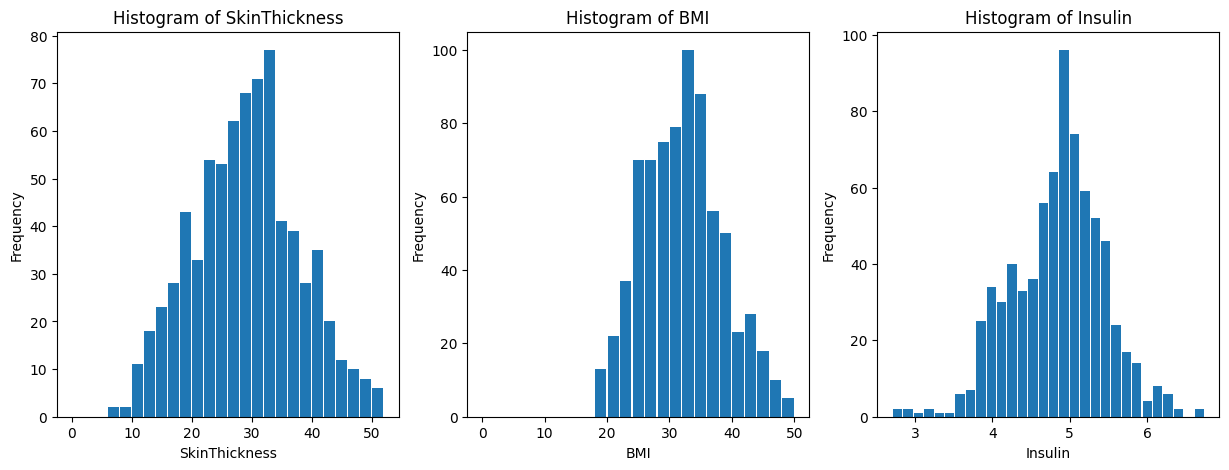

In [341]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(x=df["SkinThickness"], rwidth=0.9, bins=range(0, round(df["SkinThickness"].max() + 2), 2))
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.title("Histogram of SkinThickness")

plt.subplot(1, 3, 2)
plt.hist(x=df["BMI"], rwidth=0.9, bins=range(0, round(df["BMI"].max() + 2), 2))
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI")

plt.subplot(1, 3, 3)
plt.hist(x=df["Insulin"], rwidth=0.9, bins=30)
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.title("Histogram of Insulin")

plt.show()

### Sélectionner les variables les plus pertinentes.

La corrélation entre les variables a été analysée à l’aide de df.corr() et représentée sous forme de heatmap.
Les résultats indiquent qu’aucune corrélation forte n’est observée (corrélation maximale = 0.68).

In [ ]:
import seaborn as sb

matrice_corr = df.corr()
plt.figure(figsize=(8,6))
sb.heatmap(matrice_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Le calcul de variance:**

On calcule la variance de chaque colonne.

In [ ]:
df_original = df.copy()

df_original['Age'] = np.exp(df_original['Age'])
df_original['Pregnancies'] = np.exp(df_original['Pregnancies']) - 1
df_original['Insulin'] = np.exp(df_original['Insulin'])
df_original['DiabetesPedigreeFunction'] = np.exp(df_original['DiabetesPedigreeFunction'])

print(df_original.var().sort_values(ascending=False))


On applique la normalisation pour mettre toutes les variables sur la même échelle, puis on calcule la variance de chaque colonne.
D’après les résultats, on constate que les variances ne sont pas faibles.

In [ ]:
df_original = df.copy()

df_original['Age'] = np.exp(df_original['Age'])
df_original['Pregnancies'] = np.exp(df_original['Pregnancies']) - 1
df_original['Insulin'] = np.exp(df_original['Insulin'])
df_original['DiabetesPedigreeFunction'] = np.exp(df_original['DiabetesPedigreeFunction'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_original = pd.DataFrame(
    scaler.fit_transform(df_original),
    columns=df_original.columns
)

print(df_original.var().sort_values(ascending=False))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

### Normaliser / standardiser les variables


- Normalisation de données:

In [337]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized.to_csv(os.getcwd() + '/../data/processed/dataset-normal.csv', index=False, encoding='utf-8')

- Standardisation de données:

In [338]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standard = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_standard.to_csv(os.getcwd() + '/../data/processed/dataset-standard.csv', index=False, encoding='utf-8')

- Histogrammes aprés normalisation:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.hist(x=df_normalized["Age"], rwidth=0.9, bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

plt.subplot(3, 3, 2)
plt.hist(x=df_normalized["Pregnancies"], rwidth=0.9, bins=20)
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.title("Histogram of Pregnancies")

plt.subplot(3, 3, 3)
plt.hist(x=df_normalized["Glucose"], rwidth=0.9, bins=30)
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.title("Histogram of Glucose")

plt.subplot(3, 3, 4)
plt.hist(x=df_normalized["BloodPressure"], rwidth=0.9, bins=30)
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.title("Histogram of BloodPressure")

plt.subplot(3, 3, 5)
plt.hist(x=df_normalized["SkinThickness"], rwidth=0.9, bins=30)
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.title("Histogram of SkinThickness")

plt.subplot(3, 3, 6)
plt.hist(x=df_normalized["BMI"], rwidth=0.9, bins=30)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI")

plt.subplot(3, 3, 7)
plt.hist(x=df_normalized["DiabetesPedigreeFunction"], rwidth=0.9)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Frequency")
plt.title("Histogram of DiabetesPedigreeFunction")

plt.subplot(3, 3, 8)
plt.hist(x=df_normalized["Insulin"], rwidth=0.9, bins=30)
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.title("Histogram of Insulin")

plt.tight_layout()
plt.show()

- Histogrammes aprés standardisation

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.hist(x=df_standard["Age"], rwidth=0.9, bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

plt.subplot(3, 3, 2)
plt.hist(x=df_standard["Pregnancies"], rwidth=0.9, bins=20)
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.title("Histogram of Pregnancies")

plt.subplot(3, 3, 3)
plt.hist(x=df_standard["Glucose"], rwidth=0.9, bins=30)
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.title("Histogram of Glucose")

plt.subplot(3, 3, 4)
plt.hist(x=df_standard["BloodPressure"], rwidth=0.9, bins=30)
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.title("Histogram of BloodPressure")

plt.subplot(3, 3, 5)
plt.hist(x=df_standard["SkinThickness"], rwidth=0.9, bins=30)
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.title("Histogram of SkinThickness")

plt.subplot(3, 3, 6)
plt.hist(x=df_standard["BMI"], rwidth=0.9, bins=30)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI")

plt.subplot(3, 3, 7)
plt.hist(x=df_standard["DiabetesPedigreeFunction"], rwidth=0.9)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Frequency")
plt.title("Histogram of DiabetesPedigreeFunction")

plt.subplot(3, 3, 8)
plt.hist(x=df_standard["Insulin"], rwidth=0.9, bins=30)
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.title("Histogram of Insulin")

plt.tight_layout()
plt.show()